### Inicialmente verificar como são dispostos os dados de entrada da série<br/>
### Além disso é verificado que a série possui varias variaveis (X.RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4)

In [9]:
data1 <- read.csv(file="./MovementAAL/dataset/MovementAAL_RSS_1.csv",head=TRUE,sep=",")
print("Numero de linhas")
print(nrow(data1))
head(data1)
tail(data1)

[1] "Numero de linhas"
[1] 27


,X.RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
1,-0.90476,-0.48,0.28571,0.3
2,-0.57143,-0.32,0.14286,0.3
3,-0.38095,-0.28,-0.14286,0.35
4,-0.28571,-0.2,-0.47619,0.35
5,-0.14286,-0.2,0.14286,-0.2
6,-0.14286,-0.2,0.047619,0


,X.RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
22,-0.71429,0.16,-0.28571,0.2
23,-0.095238,-0.08,0.095238,0.35
24,-0.28571,0.04,0.14286,0.2
25,0,0.04,0.14286,0.1
26,0,0.04,-0.047619,-0.05
27,-0.14286,-0.6,-0.28571,-0.1


### Plotando os dados da matrix anterior;
o objetivo disso é compreender se a potência do sinal de cada roteador varia, já que eles são fixos e dispostos em diferentes locais.

#### como esperado o grafico faz sentido para a proposta do problema, verificamos que para cada sinal mais forte outros sinais devem enfraquecer.

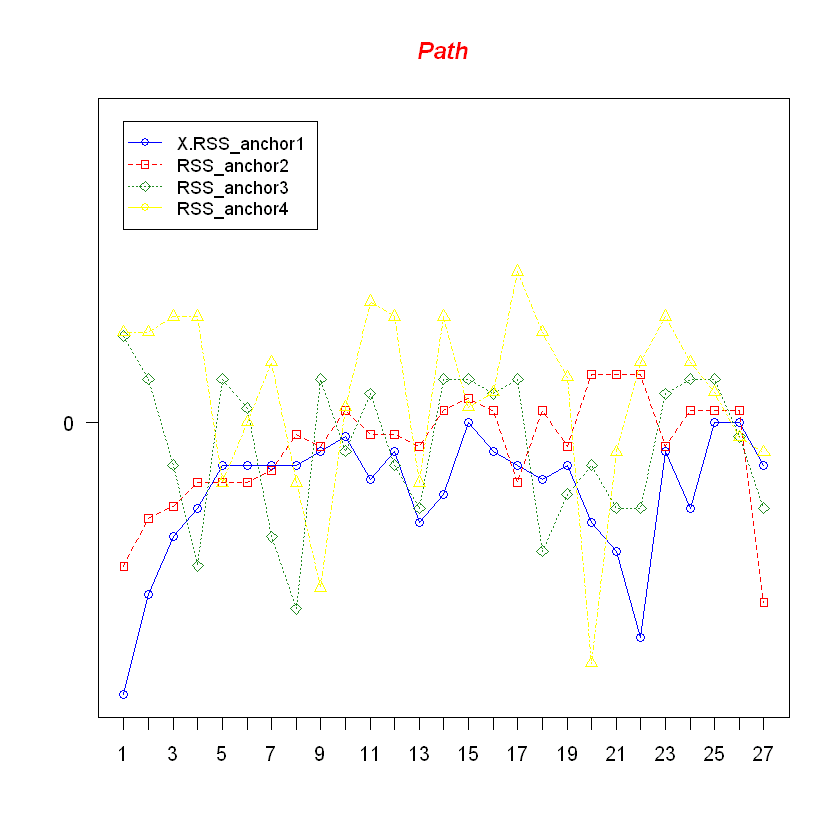

In [15]:
max_y <- max(data1)
min_y <- min(data1)
plot_colors <- c("blue","red","forestgreen","yellow")
plot(data1$X.RSS_anchor1, type="o", col=plot_colors[1], 
   ylim=c(min_y,max_y+0.5), axes=FALSE, ann=FALSE)
axis(1, at=1:27)
axis(2, las=1, at=4*0:max_y)
box()
lines(data1$RSS_anchor2, type="o", pch=22, lty=2, 
   col=plot_colors[2])
lines(data1$RSS_anchor3, type="o", pch=23, lty=3, 
   col=plot_colors[3])
lines(data1$RSS_anchor4, type="o", pch=24, lty=4, 
   col=plot_colors[4])
title(main="Path", col.main="red", font.main=4)
legend(1, 1, names(data1), cex=0.9, col=plot_colors, 
   pch=21:23, lty=1:3);

### Verificando o formado dos dados que distribuem os grupos ou diferentes ambientes testados.
#### para cada group é carregado um montante de percursos, chamados de sequence_ID (identifica uniamente cada percurso em todos os grupos)

Obs. nesse problema não é discutido os arquivos de `path` já que não faz parte da exploração do problema em si.

In [1]:
groups <- read.csv(file="./MovementAAL/groups/MovementAAL_DatasetGroup.csv",head=TRUE,sep=",")
groups1 = groups[groups$dataset_ID==1, ]
head(groups1)


,X.sequence_ID,dataset_ID
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


### Analisando a quantidade total de groups, os testes devem ser separadas para identifiar se existe alguma pecularidade em cada group (ou ambiente)
#### Nas linhas seguintes verificamos como são os dados de classificação, logo se nota que a classificação é binária dividida em 1 e -1
#### -1 siginifica que o caminho analizado não ocorreu mudança de sala, e 1 significa que ocorreu mudança de sala.
#### Para facilitar o entendimento dos processo futuros vamos renomear as classes finais em:
#### 1 = Yes
#### -1 = No


In [2]:
print("Numero de grupos, ou salas diferentes")
unique(groups$dataset_ID)

print("Target")

target <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")
head(target)
print("Numero de Classes diferentes")
unique(target$class_label)
unique(factor(target$class_label,labels=c("NO","YES")))






[1] "Numero de grupos, ou salas diferentes"


[1] 1 2 3

[1] "Target"


,X.sequence_ID,class_label
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


[1] "Numero de Classes diferentes"


[1]  1 -1

[1] YES NO 
Levels: NO YES

Como já Discutimos anteriormente. Os dados são separados em 3 ambientes diferentes.
Onde cada ambiente possui 2 salas separadas.

Dessa forma iremos construir um classificador binário para entender quando houve ou não mudança de sala. Isso é possível apartir da coleta dos dados em um periodo determinado de tempo.

Para cada coleta de dados vamos chama-lo de steps ou lags.

Abaixo esta o agrupamento de todos os percursos do primeiro ambiente ou **`group$dataset_ID =1`**


In [3]:
allDataGroup1<-list()
allDataGroup1Target<-list()
groups1 = groups[groups$dataset_ID==1, ]

index<-1
for (id in groups1$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup1[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup1Target[index]<-target[[2]][id]
    index<-index+1
}

head(allDataGroup1[[1]])


,X.RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
1,-0.90476,-0.48,0.28571,0.3
2,-0.57143,-0.32,0.14286,0.3
3,-0.38095,-0.28,-0.14286,0.35
4,-0.28571,-0.2,-0.47619,0.35
5,-0.14286,-0.2,0.14286,-0.2
6,-0.14286,-0.2,0.047619,0


Sabendo agora o que são os steps ou lags, vamos tentar entender qual a influência de cada lag para os seus 
sucessores ou antecessores.

Esse estapa é também importante em problemas de regressão, caso queiramos prever os próximos passos de uma série temporal.

Além disso, essa análise é importante para se contruir uma estrutura de dados adequado para sevir como entrada de um 
classificador binário.



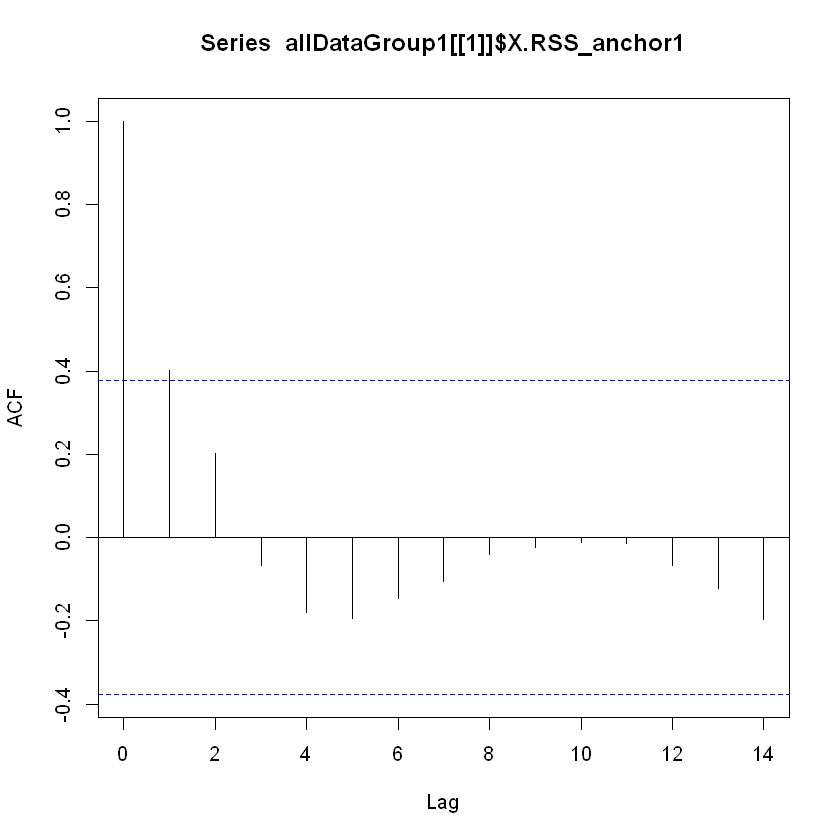

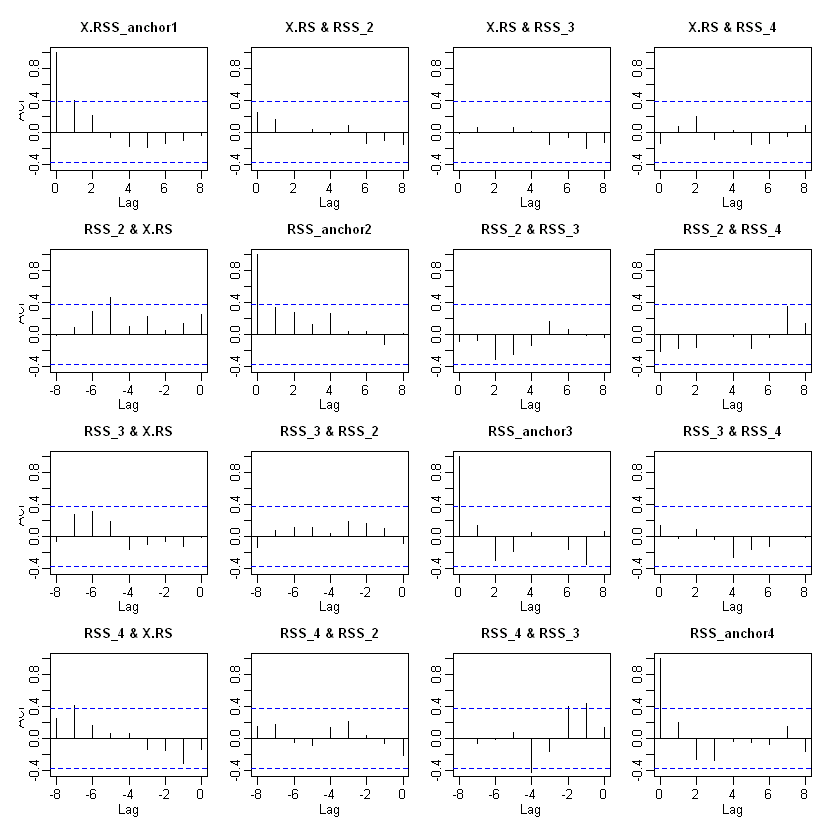

In [10]:
acf(allDataGroup1[[1]]$X.RSS_anchor1)
acf(allDataGroup1[[1]])


#### Todo os códigos apresentados foram desenvolvidos em R no cabeçalho inicial estão os pacotes usados e necessários para executar o script.

#### Em todos os Arquivos ipython, com exceção do arquivo "Problem analysis.ipynb", iremos analizar diversas técnica de classificação, onde iremos seguir a ordem:

    1. Group 1 (Ambiente 1) Cross-Validation 10-fold
    2. Group 2 (Ambiente 2) Cross-Validation 10-fold
    3. Group 3 (Ambiente 3) Cross-Validation 10-fold
    4. Todos os Groups  (Ambiente 1,Ambiente 2,Ambiente 3 ) Cross-Validation 10-fold
    5. Curva ROC e AUC com todos os Groups
    
    